# 一、浮点数运算


## 题目
判断浮点数的运行结果是否相等：

In [2]:
 a = 0.1
 b = 0.2
 c = 0.3
 assert a + b == c

## 题目解析：
本题考查的是计算机的浮点运算知识点。不仅是 python 语言，其他的编程语言也面临同样的问题：在进行浮点运算的时候，10 进制表示方式会丢掉它的精度，造成运算结果与实际结果不符合。

这是由于底层 CPU 和运算标准通过自己的浮点单位去执行算术时的特征决定的。看似有穷的小数, 在计算机的二进制表示里却是无穷的。

所以在进行高进度浮点运算的时候一定要注意，尤其是自动化测试过程中需要进行断言非常容易出错。
## 题目答案：
断言失败，抛出 AssertionError 错误。
## 解决方案：
使用 Decimal 模块：

In [3]:
 from decimal import Decimal

 a = 0.1
 b = 0.2
 c = 0.3
 assert Decimal(str(a)) + Decimal(str(b)) == Decimal(str(c))

Decimal() 可以维持浮点数的精度，在金融领域和测试领域等精度要求高的行业有非常大的作用。 

但是一定要注意： Decimal() 传的参数一定要是字符串类型，如果是数据类型会再次丢掉精度。

In [4]:
  Decimal(0.1) + Decimal(0.2) == Decimal(0.3) # False
  Decimal('0.1') + Decimal('0.2') == Decimal('0.3') # True

True

# 二、列表的扁平化和降维

## 题目
有一个二维列表，降成普通的一维的。比如说柠檬班都会有学员分组，我们想通过分组信息去获取所有的学员名称。

In [5]:
 groups = [['huahua', 'xiaojian'], ['musen', 'yuze'], ['keyou']]
 # 得到结果 ['huahua', 'xiaojian', 'musen', 'yuze', 'keyou']

## 方法一
最简单的方式可以通过 for 循环的方式一一提取：

In [6]:
result = []
for group in groups:
    for item in group:
        result.append(item)
print(result)        

['huahua', 'xiaojian', 'musen', 'yuze', 'keyou']


## 方法二
但是在面试的时候可能会加一些限制，比如让你用一行代码实现，这个时候就需要对 python 基础有进一步的理解了，比如说使用 sum 函数：

In [7]:
 names = sum(groups, [])

非常简单就实现了同样的功能。 sum 函数为什么可以做到呢？先看一个简单的例子：

In [8]:
 a = sum([1,2,3])

得到的结果是 6， 也就是说， sum 函数会把一个列表里面的每个元素相加。但是 sum 函数还可以有第二个参数：开始值，默认为 0 ， 所以上述过程其实可以写成：

In [9]:
 a = sum([1,2,3], 0)
 # 0 + 1 + 2 + 3

依据同样的道理，可以对列表进行降维操作：

In [10]:
a = sum([['yuze'], ['is'], ['a']], [])
# [] + ['yuze'] + ['is'] + ['a']
# 列表拼接
print(a)

['yuze', 'is', 'a']


## 方法三
通过列表推导式也可以方便的解决：

In [11]:
result = [item for group in groups for item in group]
result

['huahua', 'xiaojian', 'musen', 'yuze', 'keyou']

# 三、多重继承

In [12]:
class A:
    def run(self):
        print("a is running")

class B:
    def run(self):
        print("b is running")

class C(A, B):
    pass

# 会打印什么？？？
C().run()

a is running


多重继承经常用来出面试题。在这个考题中，C 类的父类 A 和 B 都实现了 run 方法，那在 C 的对象里到底是优先调用哪一个呢？

答案是： a running


## 菱形问题

In [13]:
class A:
    def run(self):
        print("a running")

class B(A):
    pass

class C(A):
    def run(self):
        print("C running")

class D(B, C):
    pass

# 会打印什么？？？
D().run()

C running


他们的继承关系图可以简化如下，这个问题又称为菱形问题或者钻石问题：

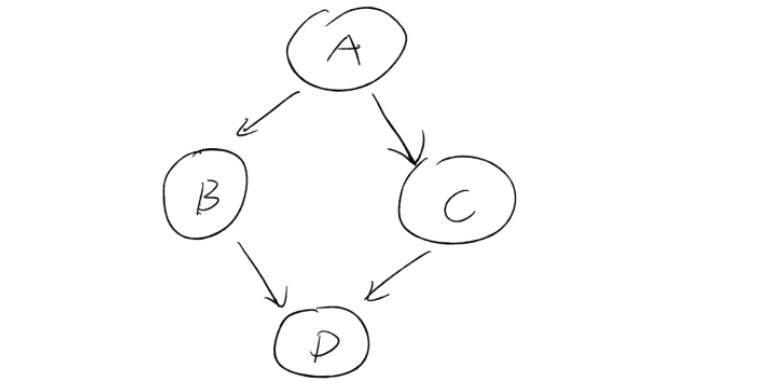

答案是： c running

如果我们不让 C 类继承 A 呢？

In [14]:
class A:
    def run(self):
        print("a running")

class B(A):
    pass

class C:
    def run(self):
        print("C running")

class D(B, C):
    pass

# 会打印什么？？？
D().run()

a running


他们的继承关系图可以简化如下，可以简称为 v 型问题:

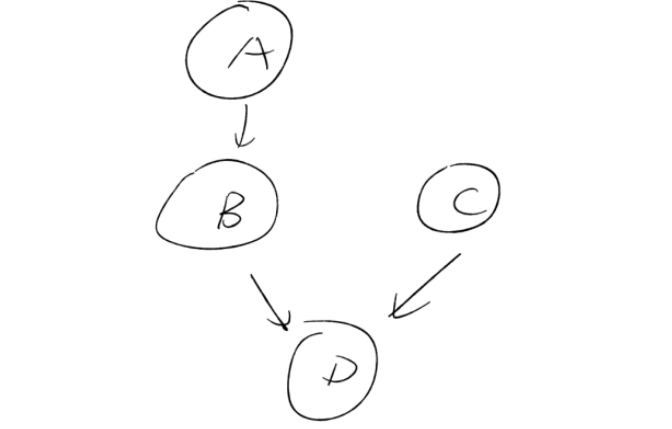

答案会变成 a running



## 题目解析
具体原因是 python 的继承会遵循特定的顺序，优先级排在前面的，子类会优先使用。怎么快速查看这种继承顺序呢？通过D.__mro__去查看

比如在 菱形问题上，d 的顺序是这样的：



In [ ]:
(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>)


D 排在最前面，如果 D 定义了 run 方法，就会被优先使用，然后是 B, 然后是C， 然后是 A, 最后是 object 基类。

而在 V 行问题上，d 的顺序又变成了这样：


In [ ]:
(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.A'>, <class '__main__.C'>, <class 'object'>)

A 和 C 互换了顺序。造成 2 个题目的答案不一致。